In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def load_data(train_size, test_size):
    train_loader = torch.utils.data.DataLoader(datasets.MNIST('data', train = True, download=True, transform=transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])), batch_size = train_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(datasets.MNIST('data', train = False, transform=transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])), batch_size = test_size, shuffle=True)
    return (train_loader, test_loader)

In [6]:
class Modeln(nn.Module):
    def __init__(self):
        super(Modeln, self).__init__()
        self.cn1 = nn.Conv2d(1, 6, 5)
        self.cn2 = nn.Conv2d(6, 16, 5)
        self.lin1 = nn.Linear(16 * 5 * 5, 120)
        self.lin2 = nn.Linear(120, 84)
        self.lin3 = nn.Linear(84, 10)
    def forward(self, x):
        a = F.max_pool2d(F.relu(self.cn1(a)), 2)
        a = F.max_pool2d(F.relu(self.cn2(a)), 2)
        a = x.view(x.size()[0], -1)
        a = F.relu(self.lin1(a))
        a = F.relu(self.lin2(a))
        a = self.lin3(a)
        return a

In [7]:
def calculate_parameters(modelName, model):
    param = sum(p.numel() for p in model.parameters())
    print('{}: {}'.format(modelName, param))
    return param

In [8]:
def init_optimizer(model):
    return optim.SGD(model.parameters(), lr=1e-3, momentum=0.9, nesterov=True)

In [9]:
def train(model, optimizer, train_loader):
    model.train()
    for batch_id, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_funct(output, target)
        loss.backward()
        optimizer.step()

In [10]:
def calculate_loss(model, loader, loss_fn):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data)
            cost = loss_funct(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct/total, 3)

In [11]:
train_loss_lst = []
test_loss_lst = []
test_acc_lst= []
train_acc_lst = []
epochs = 28
def train_model(model, optimizer, train_data, test_data):
    print('Training model ')
    for epoch in range(1, epochs + 1):
        train(model, optimizer, train_data)
        loss_train, acc_train = calculate_loss(model, train_data, loss_funct)
        loss_test, acc_test = calculate_loss(model, test_data, loss_funct)
    train_loss_lst.append(loss_train)
    test_loss_lst.append(loss_test)
    train_acc_lst.append(acc_train)
    test_acc_lst.append(acc_test)
    print("test loss - ", loss_test, "epoch - ", epoch)
    print('Training completed')

In [12]:
train_data, test_data = load_data(64, 64)
model = Modeln()
loss_funct = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)
train_loss_lst_m1, test_loss_lst_m1, train_acc_lst_m1, test_acc_lst_m1 = train_model(model, optimizer, train_data, test_data)

Training model 
test loss -  tensor(1.1997)  epoch -  1
test loss -  tensor(0.3235)  epoch -  2
test loss -  tensor(0.2102)  epoch -  3
test loss -  tensor(0.1420)  epoch -  4
test loss -  tensor(0.1106)  epoch -  5
test loss -  tensor(0.0978)  epoch -  6
test loss -  tensor(0.0949)  epoch -  7
test loss -  tensor(0.0819)  epoch -  8
test loss -  tensor(0.0766)  epoch -  9
test loss -  tensor(0.0771)  epoch -  10
test loss -  tensor(0.0677)  epoch -  11
test loss -  tensor(0.0636)  epoch -  12
test loss -  tensor(0.0589)  epoch -  13
test loss -  tensor(0.0526)  epoch -  14
test loss -  tensor(0.0586)  epoch -  15
test loss -  tensor(0.0530)  epoch -  16
test loss -  tensor(0.0546)  epoch -  17
test loss -  tensor(0.0532)  epoch -  18
test loss -  tensor(0.0458)  epoch -  19
test loss -  tensor(0.0515)  epoch -  20
test loss -  tensor(0.0500)  epoch -  21
test loss -  tensor(0.0458)  epoch -  22
test loss -  tensor(0.0477)  epoch -  23
test loss -  tensor(0.0467)  epoch -  24
test loss

In [21]:
train_data, test_data = load_data(1024, 1024)
model = Modeln()
loss_funct = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)
train_loss_lst_m2, test_loss_lst_m2, train_acc_lst_m2, test_acc_lst_m2 = train_model(model, optimizer, train_data, test_data)

Training model 
test loss -  tensor(2.3027)  epoch -  1
test loss -  tensor(2.3020)  epoch -  2
test loss -  tensor(2.3011)  epoch -  3
test loss -  tensor(2.3004)  epoch -  4
test loss -  tensor(2.2995)  epoch -  5
test loss -  tensor(2.2985)  epoch -  6
test loss -  tensor(2.2975)  epoch -  7
test loss -  tensor(2.2962)  epoch -  8
test loss -  tensor(2.2948)  epoch -  9
test loss -  tensor(2.2929)  epoch -  10
test loss -  tensor(2.2908)  epoch -  11
test loss -  tensor(2.2881)  epoch -  12
test loss -  tensor(2.2847)  epoch -  13
test loss -  tensor(2.2801)  epoch -  14
test loss -  tensor(2.2740)  epoch -  15
test loss -  tensor(2.2652)  epoch -  16
test loss -  tensor(2.2516)  epoch -  17
test loss -  tensor(2.2291)  epoch -  18
test loss -  tensor(2.1880)  epoch -  19
test loss -  tensor(2.1018)  epoch -  20
test loss -  tensor(1.8987)  epoch -  21
test loss -  tensor(1.4487)  epoch -  22
test loss -  tensor(0.9483)  epoch -  23
test loss -  tensor(0.6991)  epoch -  24
test loss

In [22]:
thetha1 = torch.nn.utils.parameters_to_vector(model.parameters())
thetha2 = torch.nn.utils.parameters_to_vector(model2.parameters())

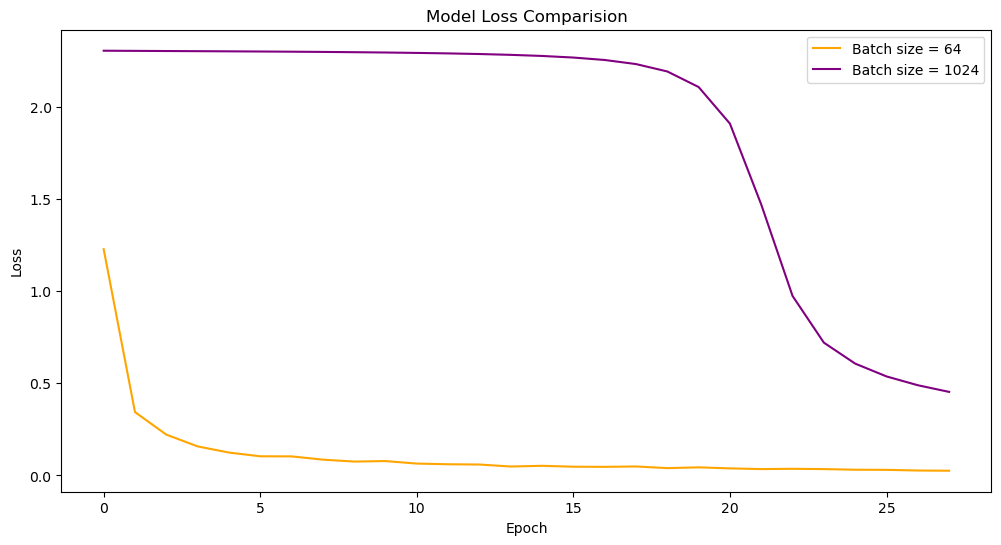

In [23]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 28, 1), train_loss_arr_m1, color = "orange")
plt.plot(np.arange(0, 28, 1), train_loss_arr_m2, color = "purple")
plt.title('Model Loss Comparision')
plt.legend(['Batch size = 64', 'Batch size = 1024'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

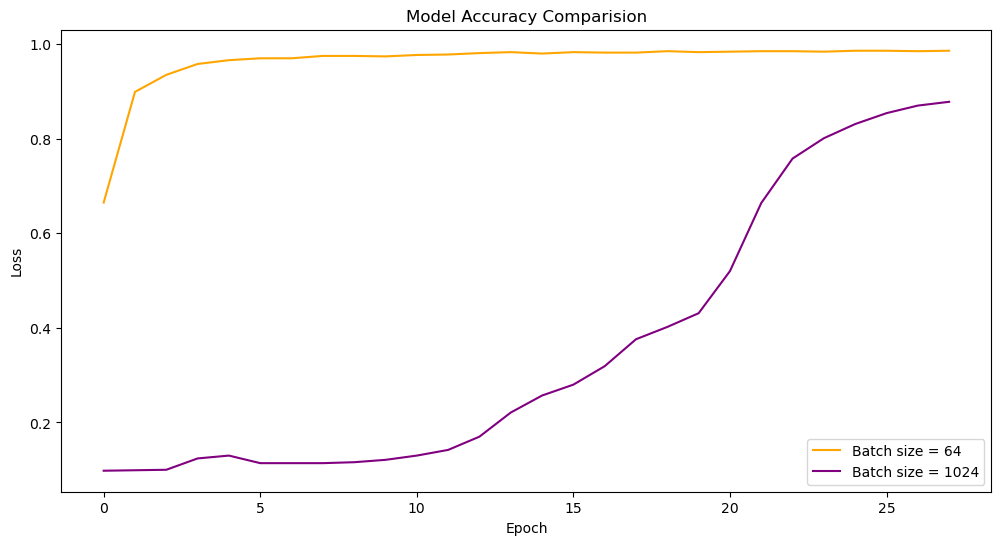

In [24]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 28, 1), test_accuracy_arr_m1, color = "orange")
plt.plot(np.arange(0, 28, 1), test_accuracy_arr_m2, color = "purple")
plt.title('Model Accuracy Comparision')
plt.legend(['Batch size = 64', 'Batch size = 1024'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [25]:
thetha_alpha = np.arange(-2, 2, 0.2)
theta_lst =[]
for i in range (len(thetha_alpha)):
    th = (1-thetha_alpha[i])*thetha1 + thetha_alpha[i]* thetha2
    theta_lst.append(th)

In [26]:
loss_train_alpha_lst = []
loss_test_alpha_lst = []
acc_train_alpha_lst = []
acc_test_alpha_lst = []
for i in range (len(theta_lst)):
    print('Running for theta - ' , i)
    th = (1-thetha_alpha[i])*thetha1 + thetha_alpha[i]* thetha2
    model = Modeln()
    torch.nn.utils.vector_to_parameters(th, model.parameters())
    loss_function = nn.CrossEntropyLoss()
    temp = []
    for p in model.parameters():
        temp.append(torch.numel(p))
    alpha_loss_train, alpha_acc_train = calculate_loss(model, train_data)
    alpha_loss_test, alpha_acc_test = calculate_loss(model, test_data)
    print('Alpha Loss - ' , alpha_loss_test)
    loss_train_alpha_lst.append(alpha_loss_train)
    acc_train_alpha_lst.append(alpha_acc_train)
    loss_test_alpha_lst.append(alpha_loss_test)
    acc_test_alpha_lst.append(alpha_acc_test)

Running for theta -  0
Alpha loss -  tensor(39.4918)
Running for theta -  1
Alpha loss -  tensor(25.2989)
Running for theta -  2
Alpha loss -  tensor(15.2604)
Running for theta -  3
Alpha loss -  tensor(8.8804)
Running for theta -  4
Alpha loss -  tensor(4.8752)
Running for theta -  5
Alpha loss -  tensor(2.5266)
Running for theta -  6
Alpha loss -  tensor(1.1884)
Running for theta -  7
Alpha loss -  tensor(0.5192)
Running for theta -  8
Alpha loss -  tensor(0.2057)
Running for theta -  9
Alpha loss -  tensor(0.0765)
Running for theta -  10
Alpha loss -  tensor(0.0411)
Running for theta -  11
Alpha loss -  tensor(0.1650)
Running for theta -  12
Alpha loss -  tensor(1.2738)
Running for theta -  13
Alpha loss -  tensor(1.7639)
Running for theta -  14
Alpha loss -  tensor(0.9258)
Running for theta -  15
Alpha loss -  tensor(0.4296)
Running for theta -  16
Alpha loss -  tensor(0.7557)
Running for theta -  17
Alpha loss -  tensor(2.5332)
Running for theta -  18
Alpha loss -  tensor(7.1365)


Text(0, 0.5, 'Loss')

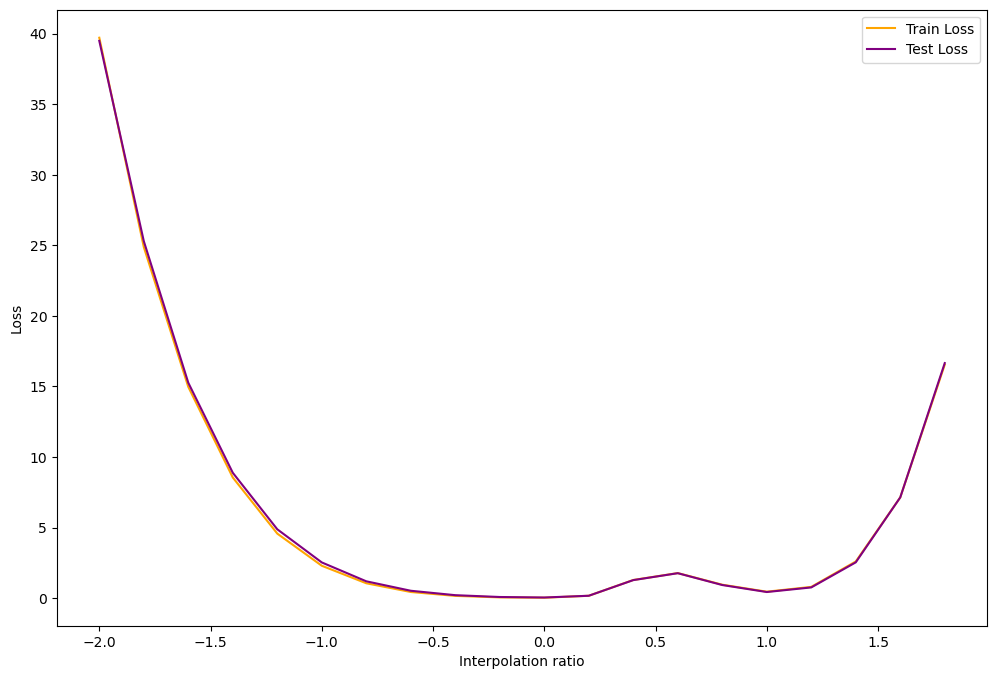

In [27]:
plt.figure(figsize=(12,6))
plt.plot(alpha, loss_train_alpha_lst, color = "orange")
plt.plot(alpha, loss_test_alpha_lst, color = "purple")
plt.xlabel('Interpolation ratio')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Testing Loss'])

Text(0, 0.5, 'Accuracy')

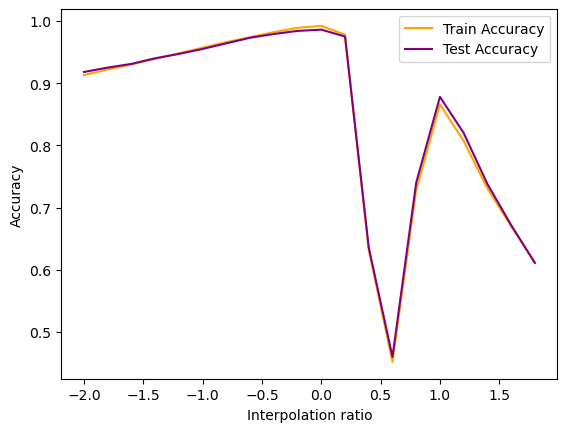

In [28]:
plt.plot(alpha, alpha_train_acc_arr, color = "orange")
plt.plot(alpha, alpha_test_acc_arr, color = "purple")
plt.legend(['Train Accuracy' , 'Test Accuracy'])
plt.xlabel('Interpolation ratio')
plt.ylabel('Accuracy')